# EDA

In [2]:
# import packages needed for scikit-learn, keras ,and tensor flow image classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from PIL import Image
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data
labels = pd.read_csv('../data/raw/labels.csv', index_col=0)
labels.head()

,filename,label
image_id,,
1,1.jpg,2
2,2.jpg,4
3,3.jpg,2
4,4.jpg,3
5,5.jpg,5


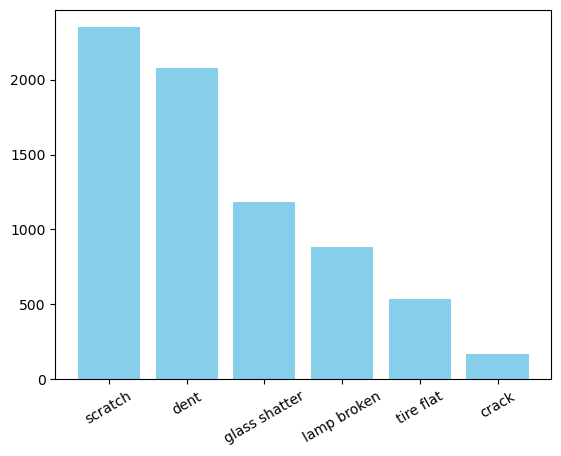

In [5]:
label_code = pd.Series({1: 'crack', 2: 'scratch', 3: 'tire flat', 4: 'dent', 5: 'glass shatter', 6: 'lamp broken'})

label_counts = labels['label'].value_counts()
plt.bar(label_code[label_counts.index], label_counts, color='skyblue')
plt.tick_params(axis='x', rotation=30)

In [27]:
train, test = train_test_split(train_labels, stratify=train_labels['label'], random_state=42, test_size=.2)
train.head()

,filename,label
image_id,,
6203,6203.jpg,2
5599,5599.jpg,2
2235,2235.jpg,5
2858,2858.jpg,4
5589,5589.jpg,4


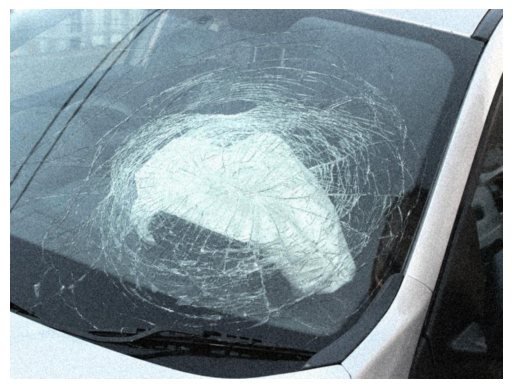

In [47]:
image = Image.open('data/train/images/8.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [38]:
image.size

(845, 633)

In [35]:
# Resize the image to the input shape expected by the model (e.g., 224x224 for many CNNs)
image_resized = image.resize((224, 224))

# Convert the image to a NumPy array
image_array = np.array(image_resized)

# Normalize the image (Rescale pixel values between 0 and 1)
image_array_normalized = image_array / 255.0

# Add an extra dimension to match the input shape required by Keras (batch size, height, width, channels)
image_array_reshaped = np.expand_dims(image_array_normalized, axis=0)

print(image_array_reshaped.shape)

(1, 224, 224, 3)


In [40]:
# Resize the image to a fixed size
image_resized = image.resize((64, 64))  # Resize to 64x64 for scikit-learn

# Convert the image to a NumPy array
image_array = np.array(image_resized)

# Flatten the image into a 1D vector
image_flattened = image_array.flatten()

# Optional: Normalize the pixel values (standardize to mean=0 and std=1)
scaler = StandardScaler()
image_flattened_normalized = scaler.fit_transform(image_flattened.reshape(-1, 1)).flatten()

print(image_flattened_normalized.shape)  # Output shape should be (64 * 64 * 3,) = (12288,)

(12288,)
